In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
roc_auc_score, roc_curve, confusion_matrix
)

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [83]:
# Load the dataset
file_path = "Final_Dataset_AllFullHeadings (1).csv"
data_df = pd.read_csv(file_path)

# Quick look at the first few rows
data_df.head()

,League Division,Match Date (dd/mm/yy),Match Time,Home Team,Away Team,Full Time Home Team Goals,Full Time Away Team Goals,"Full Time Result (H=Home Win, D=Draw, A=Away Win)",Half Time Home Team Goals,Half Time Away Team Goals,"Half Time Result (H=Home Win, D=Draw, A=Away Win)",Match Referee,Home Team Shots,Away Team Shots,Home Team Shots on Target,Away Team Shots on Target,Home Team Fouls Committed,Away Team Fouls Committed,Home Team Corners,Away Team Corners,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards,Bet365 home win odds,Bet365 draw odds,Bet365 away win odds,Bet&Win home win odds,Bet&Win draw odds,Bet&Win away win odds,Interwetten home win odds,Interwetten draw odds,Interwetten away win odds,Pinnacle Sports home win odds,Pinnacle Sports draw odds,Pinnacle Sports away win odds,William Hill home win odds,William Hill draw odds,William Hill away win odds,VC Bet home win odds,VC Bet draw odds,VC Bet away win odds,Maximum Home Win Odds (Market),Maximum Draw Odds (Market),Maximum Away Win Odds (Market),Average Home Win Odds (Market),Average Draw Odds (Market),Average Away Win Odds (Market),Bet365 over 2.5 goals,Bet365 under 2.5 goals,Pinnacle over 2.5 goals odds,Pinnacle under 2.5 goals odds,Maximum over 2.5 goals odds (Market),Maximum under 2.5 goals odds (Market),Average over 2.5 goals odds (Market),Average under 2.5 goals odds (Market),Market size of Asian handicap (home team),Bet365 Asian handicap home team odds,Bet365 Asian handicap away team odds,Pinnacle Asian handicap home team odds,Pinnacle Asian handicap away team odds,Maximum Asian handicap home team odds (Market),Maximum Asian handicap away team odds (Market),Average Asian handicap home team odds (Market),Average Asian handicap away team odds (Market),Bet365 closing home win odds,Bet365 closing draw odds,Bet365 closing away win odds,Bet&Win closing home win odds,Bet&Win closing draw odds,Bet&Win closing away win odds,Interwetten closing home win odds,Interwetten closing draw odds,Interwetten closing away win odds,Pinnacle Sports closing home win odds,Pinnacle Sports closing draw odds,Pinnacle Sports closing away win odds,William Hill closing home win odds,William Hill closing draw odds,William Hill closing away win odds,VC Bet closing home win odds,VC Bet closing draw odds,VC Bet closing away win odds,Maximum closing home win odds (Market),Maximum closing draw odds (Market),Maximum closing away win odds (Market),Average closing home win odds (Market),Average closing draw win odds (Market),Average closing away win odds (Market),Bet365 closing over 2.5 goals odds,Bet365 closing under 2.5 goals odds,Pinnacle closing over 2.5 goals odds,Pinnacle closing under 2.5 goals odds,Maximum closing over 2.5 goals odds (Market),Maximum closing under 2.5 goals odds (Market),Average closing over 2.5 goals odds (Market),Average closing under 2.5 goals odds (Market)
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,M Oliver,15,12,7,5,9,9,11,2,0,2,0,0,1.14,10.00,19.00,1.14,8.25,18.50,1.15,8.00,18.00,1.15,9.59,18.05,1.12,8.5,21.00,1.14,9.5,23.00,1.16,10.00,23.00,1.14,8.75,19.83,1.40,3.00,1.40,3.11,1.45,3.11,1.41,2.92,-2.25,1.96,1.94,1.97,1.95,1.97,2.00,1.94,1.94,1.14,9.50,21.00,1.14,9.0,20.00,1.15,8.00,18.00,1.14,10.43,19.63,1.11,9.5,21.00,1.14,9.50,23.00,1.16,10.50,23.00,1.14,9.52,19.18,1.3,3.50,1.34,3.44,1.36,3.76,1.32,3.43
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,M Dean,5,14,3,9,6,13,1,1,2,2,0,0,12.00,6.50,1.22,11.50,5.75,1.26,11.00,6.10,1.25,11.68,6.53,1.26,13.00,6.0,1.24,12.00,6.5,1.25,13.00,6.75,1.29,11.84,6.28,1.25,1.44,2.75,1.49,2.77,1.51,2.77,1.48,2.65,1.75,2.00,1.90,2.02,1.90,2.02,1.92,1.99,1.89,12.00,7.00,1.25,11.00,6.0,1.26,11.00,6.10,1.25,11.11,6.68,1.27,11.00,6.5,1.24,12.00,6.50,1.25,13.00,7.00,1.29,11.14,6.46,1.26,1.4,3.00,1.43,3.03,1.50,3.22,1.41,2.91
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,K Friend,13,8,3,3,10,19,3,4,2,1,0,0,1.95,3.60,3.60,1.95,3.60,3.90,1.97,3.55,3.80,2.04,3.57,3.90,2.00,3.5,3.

In [85]:
# Check basic info: rows, columns, data types, memory usage
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 97 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   League Division                                    1020 non-null   object 
 1   Match Date (dd/mm/yy)                              1020 non-null   object 
 2   Match Time                                         1020 non-null   object 
 3   Home Team                                          1020 non-null   object 
 4   Away Team                                          1020 non-null   object 
 5   Full Time Home Team Goals                          1020 non-null   int64  
 6   Full Time Away Team Goals                          1020 non-null   int64  
 7   Full Time Result (H=Home Win, D=Draw, A=Away Win)  1020 non-null   object 
 8   Half Time Home Team Goals                          1020 non-null   int64  
 9   Half Tim

In [86]:
# Check for missing values in each column
null_counts = data_df.isnull().sum()

# Show only columns that have at least 1 null
null_counts[null_counts > 0]

# Show null counts for all columns
null_counts

League Division                                      0
Match Date (dd/mm/yy)                                0
Match Time                                           0
Home Team                                            0
Away Team                                            0
Full Time Home Team Goals                            0
Full Time Away Team Goals                            0
Full Time Result (H=Home Win, D=Draw, A=Away Win)    0
Half Time Home Team Goals                            0
Half Time Away Team Goals                            0
Half Time Result (H=Home Win, D=Draw, A=Away Win)    0
Match Referee                                        0
Home Team Shots                                      0
Away Team Shots                                      0
Home Team Shots on Target                            0
Away Team Shots on Target                            0
Home Team Fouls Committed                            0
Away Team Fouls Committed                            0
Home Team 

In [87]:
data_df = data_df.fillna(data_df.median(numeric_only=True))

In [88]:
# Check for missing values in each column
null_counts = data_df.isnull().sum()

# Show only columns that have at least 1 null
null_counts[null_counts > 0]

# Show null counts for all columns
null_counts

League Division                                      0
Match Date (dd/mm/yy)                                0
Match Time                                           0
Home Team                                            0
Away Team                                            0
Full Time Home Team Goals                            0
Full Time Away Team Goals                            0
Full Time Result (H=Home Win, D=Draw, A=Away Win)    0
Half Time Home Team Goals                            0
Half Time Away Team Goals                            0
Half Time Result (H=Home Win, D=Draw, A=Away Win)    0
Match Referee                                        0
Home Team Shots                                      0
Away Team Shots                                      0
Home Team Shots on Target                            0
Away Team Shots on Target                            0
Home Team Fouls Committed                            0
Away Team Fouls Committed                            0
Home Team 

There are no Null values in the dataset, hence we don't have to fill missing values with their respective median values

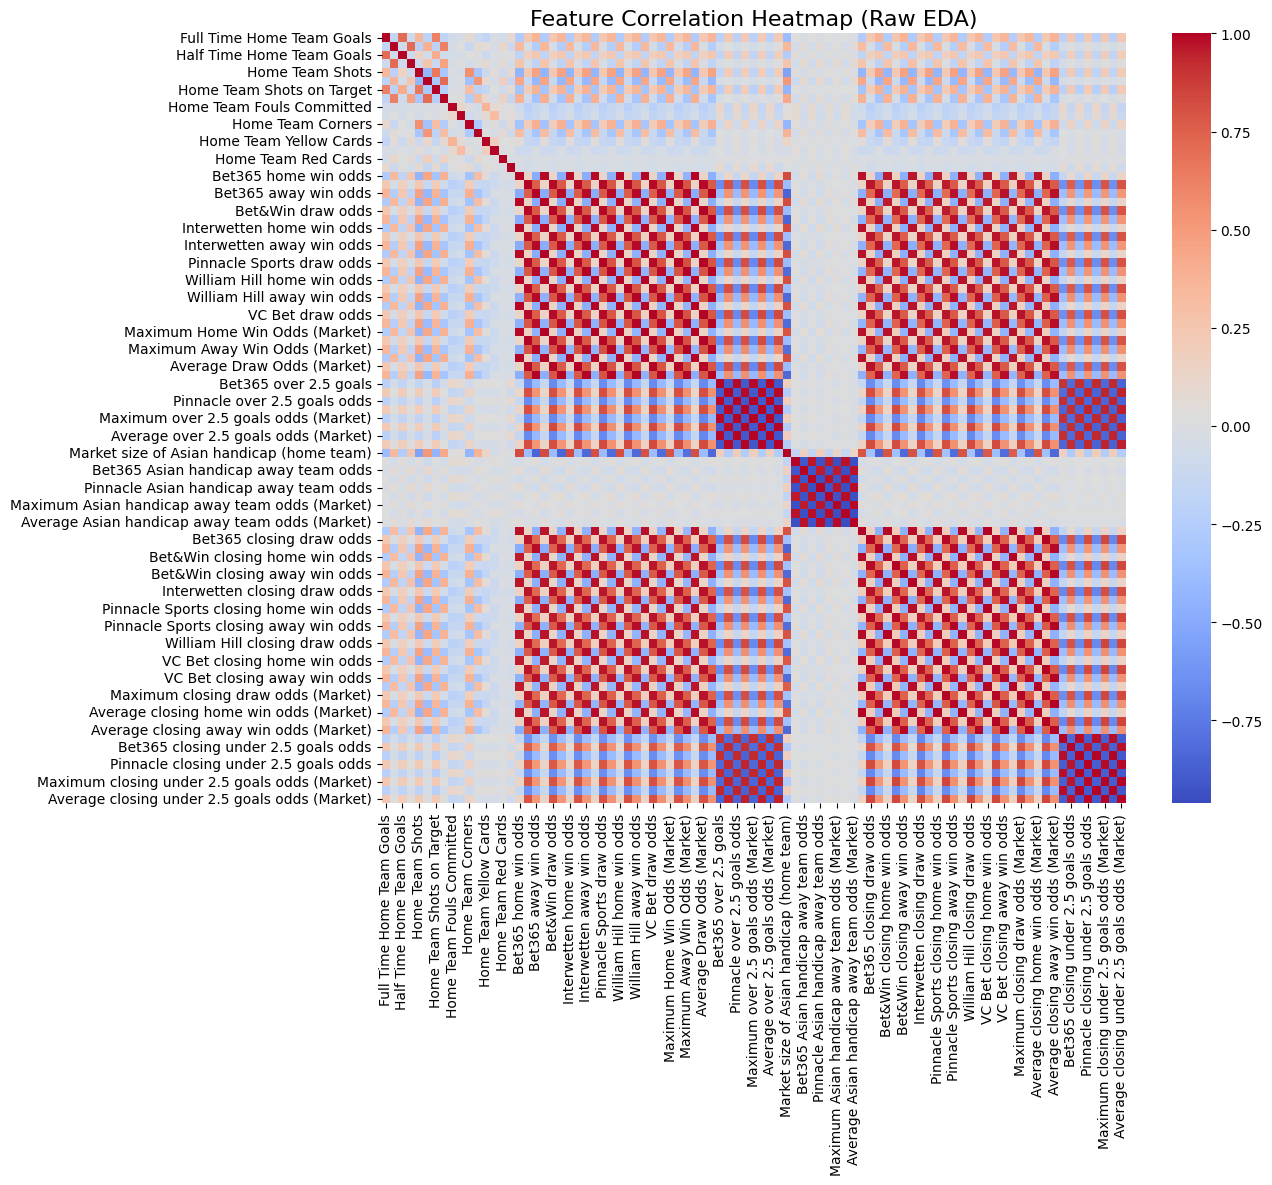

In [89]:
# numeric-only dataframe
numeric_df = data_df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,10))
sns.heatmap(
    numeric_df.corr(),
    annot=False,     # Set to True if you want numbers
    cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap (Raw EDA)", fontsize=16)
plt.show()

Right off the bat, the correlation map is unreadable due it's size, density and the complexity of the data. 
This is not useful EDA anymore. It looks “impressive”, but it communicates nothing. The columns with mostly grey correlations are of no importance to us and indicate low relevance to the home/away goals. 

Many of these features are highly correlated with each other and add noise (most of the betting odds), making interpretation difficult. Therefore, we perform feature pruning before test/training split and modeling. 

In [90]:
# ---- KEEP ONLY BET365 ODDS -----

# Keywords that identify Bet365 odds
bet365_keywords = [
    "Bet365",
    "Bet365 home win odds",
    "Bet365 draw odds",
    "Bet365 away win odds",
    "Bet365 over 2.5 goals",
    "Bet365 under 2.5 goals",
    "Bet365 Asian handicap home team odds",
    "Bet365 Asian handicap away team odds"
]

# Find all odds columns (contain the word "odds" or "Odds")
odds_cols = [col for col in data_df.columns if "odd" in col.lower()]

# Filter Bet365 columns from the odds columns
bet365_cols = [col for col in odds_cols if "bet365" in col.lower()]

print("Total odds columns:", len(odds_cols))
print("Bet365 odds kept:", len(bet365_cols))

# Drop all non-Bet365 odds
non_bet365_cols = [col for col in odds_cols if col not in bet365_cols]

data_df = data_df.drop(columns=['League Division'], errors='ignore')

print("Non-Bet365 odds removed:", len(non_bet365_cols))
print(non_bet365_cols)

data_df_reduced = data_df.drop(columns=non_bet365_cols, errors='ignore')

print("Original shape:", data_df.shape)
print("Reduced shape:", data_df_reduced.shape)

Total odds columns: 70
Bet365 odds kept: 10
Non-Bet365 odds removed: 60
['Bet&Win home win odds', 'Bet&Win draw odds', 'Bet&Win away win odds', 'Interwetten home win odds', 'Interwetten draw odds', 'Interwetten away win odds', 'Pinnacle Sports home win odds', 'Pinnacle Sports draw odds', 'Pinnacle Sports away win odds', 'William Hill home win odds', 'William Hill draw odds', 'William Hill away win odds', 'VC Bet home win odds', 'VC Bet draw odds', 'VC Bet away win odds', 'Maximum Home Win Odds (Market)', 'Maximum Draw Odds (Market)', 'Maximum Away Win Odds (Market)', 'Average Home Win Odds (Market)', 'Average Draw Odds (Market)', 'Average Away Win Odds (Market)', 'Pinnacle over 2.5 goals odds', 'Pinnacle under 2.5 goals odds', 'Maximum over 2.5 goals odds (Market)', 'Maximum under 2.5 goals odds (Market)', 'Average over 2.5 goals odds (Market)', 'Average under 2.5 goals odds (Market)', 'Pinnacle Asian handicap home team odds', 'Pinnacle Asian handicap away team odds', 'Maximum Asian ha

In [91]:
# numeric-only features
numeric_df = data_df_reduced.select_dtypes(include=['int64', 'float64'])

targets = ['Full Time Home Team Goals', 'Full Time Away Team Goals']

# correlation matrix
corr_matrix = numeric_df.corr()

# extract correlation with the two targets
target_corr = corr_matrix[targets]

# compute absolute correlation for ranking
abs_corr = target_corr.abs()

# sort by lowest correlation for each target
lowest_corr_home = abs_corr['Full Time Home Team Goals'].sort_values()
lowest_corr_away = abs_corr['Full Time Away Team Goals'].sort_values()

print("Lowest correlation with HOME goals:")
print(lowest_corr_home.head(40))

print("\nLowest correlation with AWAY goals:")
print(lowest_corr_away.head(40))

Lowest correlation with HOME goals:
Bet365 Asian handicap home team odds         0.015499
Away Team Yellow Cards                       0.016818
Bet365 Asian handicap away team odds         0.021565
Away Team Fouls Committed                    0.029088
Home Team Red Cards                          0.060041
Home Team Fouls Committed                    0.065487
Home Team Corners                            0.080933
Away Team Red Cards                          0.092399
Away Team Corners                            0.093540
Half Time Away Team Goals                    0.094645
Full Time Away Team Goals                    0.158526
Home Team Yellow Cards                       0.162557
Away Team Shots on Target                    0.165044
Away Team Shots                              0.201238
Bet365 closing over 2.5 goals odds           0.206427
Bet365 over 2.5 goals                        0.207199
Bet365 under 2.5 goals                       0.227315
Bet365 closing draw odds                     0

In [92]:
# --- TARGET NAMES ---
home_target = 'Full Time Home Team Goals'
away_target = 'Full Time Away Team Goals'

# --- SELECT NUMERIC FEATURES ONLY ---
numeric_df = data_df_reduced.select_dtypes(include=['int64', 'float64'])

# --- COMPUTE CORRELATION MATRIX ---
corr_matrix = numeric_df.corr()

# --- CORRELATION WITH TARGETS ---
corr_home = corr_matrix[home_target].abs()
corr_away = corr_matrix[away_target].abs()

# --- CUTOFF ---
cutoff = 0.10

remove_home = corr_home[corr_home < cutoff].index.tolist()
remove_away = corr_away[corr_away < cutoff].index.tolist()

data_home_clean = data_df_reduced.drop(columns=remove_home, errors='ignore')
data_away_clean = data_df_reduced.drop(columns=remove_away, errors='ignore')

print("Home cleaned shape:", data_home_clean.shape)
print("Away cleaned shape:", data_away_clean.shape)

Home cleaned shape: (1020, 26)
Away cleaned shape: (1020, 22)


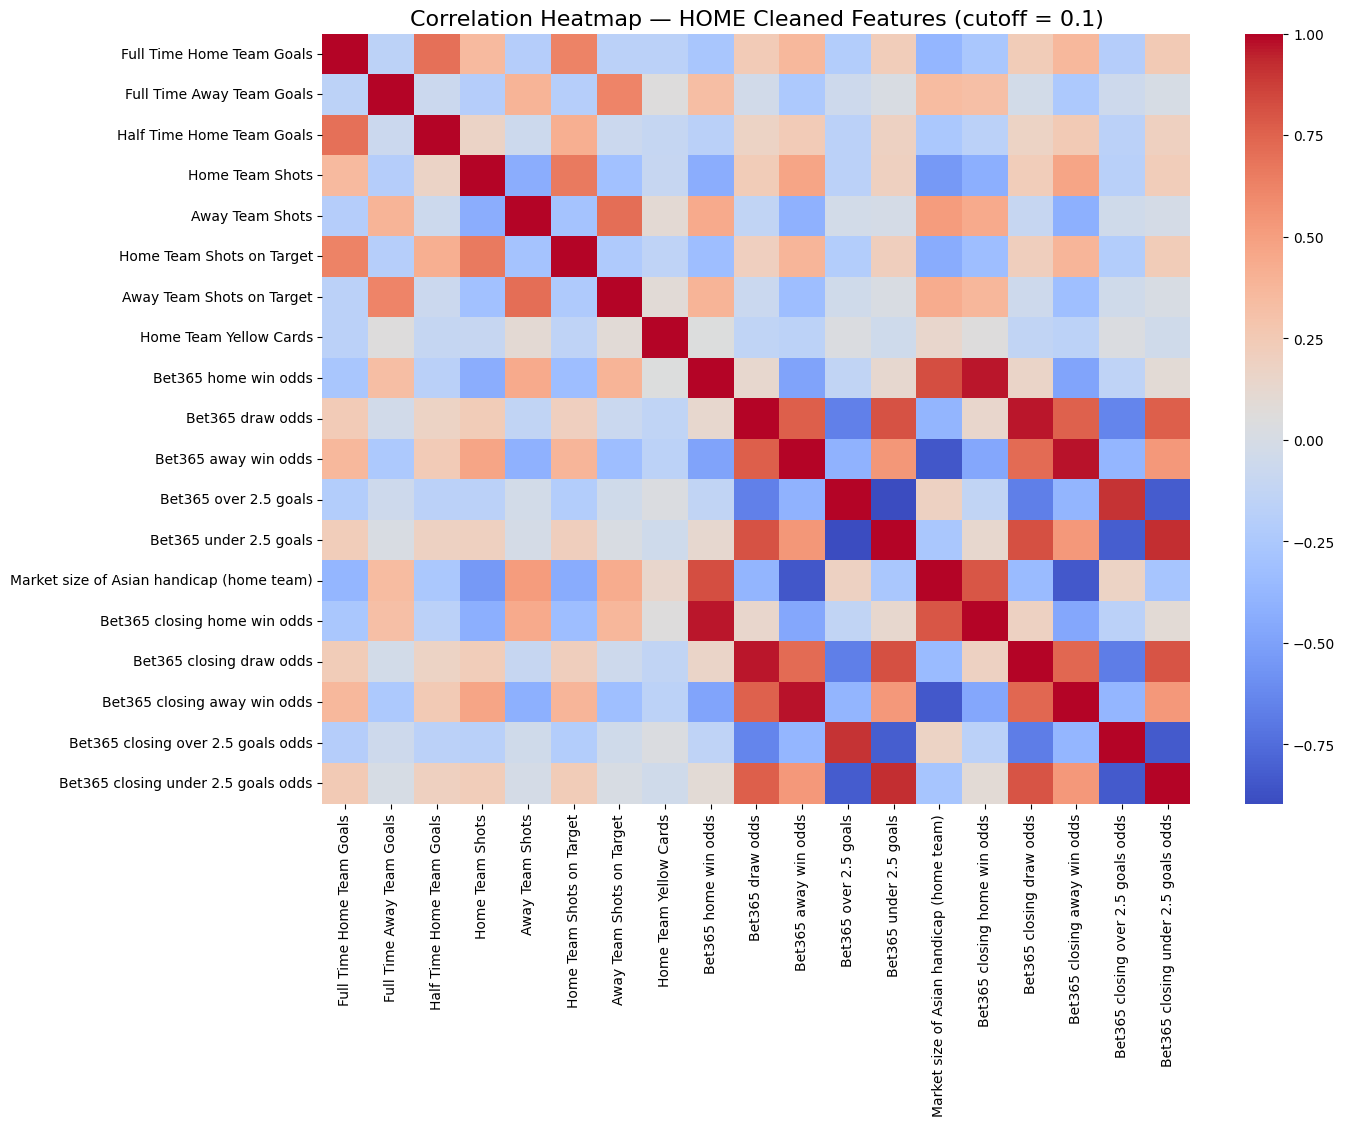

In [93]:
# numeric-only for HOME cleaned dataset
numeric_home = data_home_clean.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14, 10))
sns.heatmap(
    numeric_home.corr(),
    cmap='coolwarm',
    annot=False
)
plt.title("Correlation Heatmap — HOME Cleaned Features (cutoff = 0.1)", fontsize=16)
plt.show()

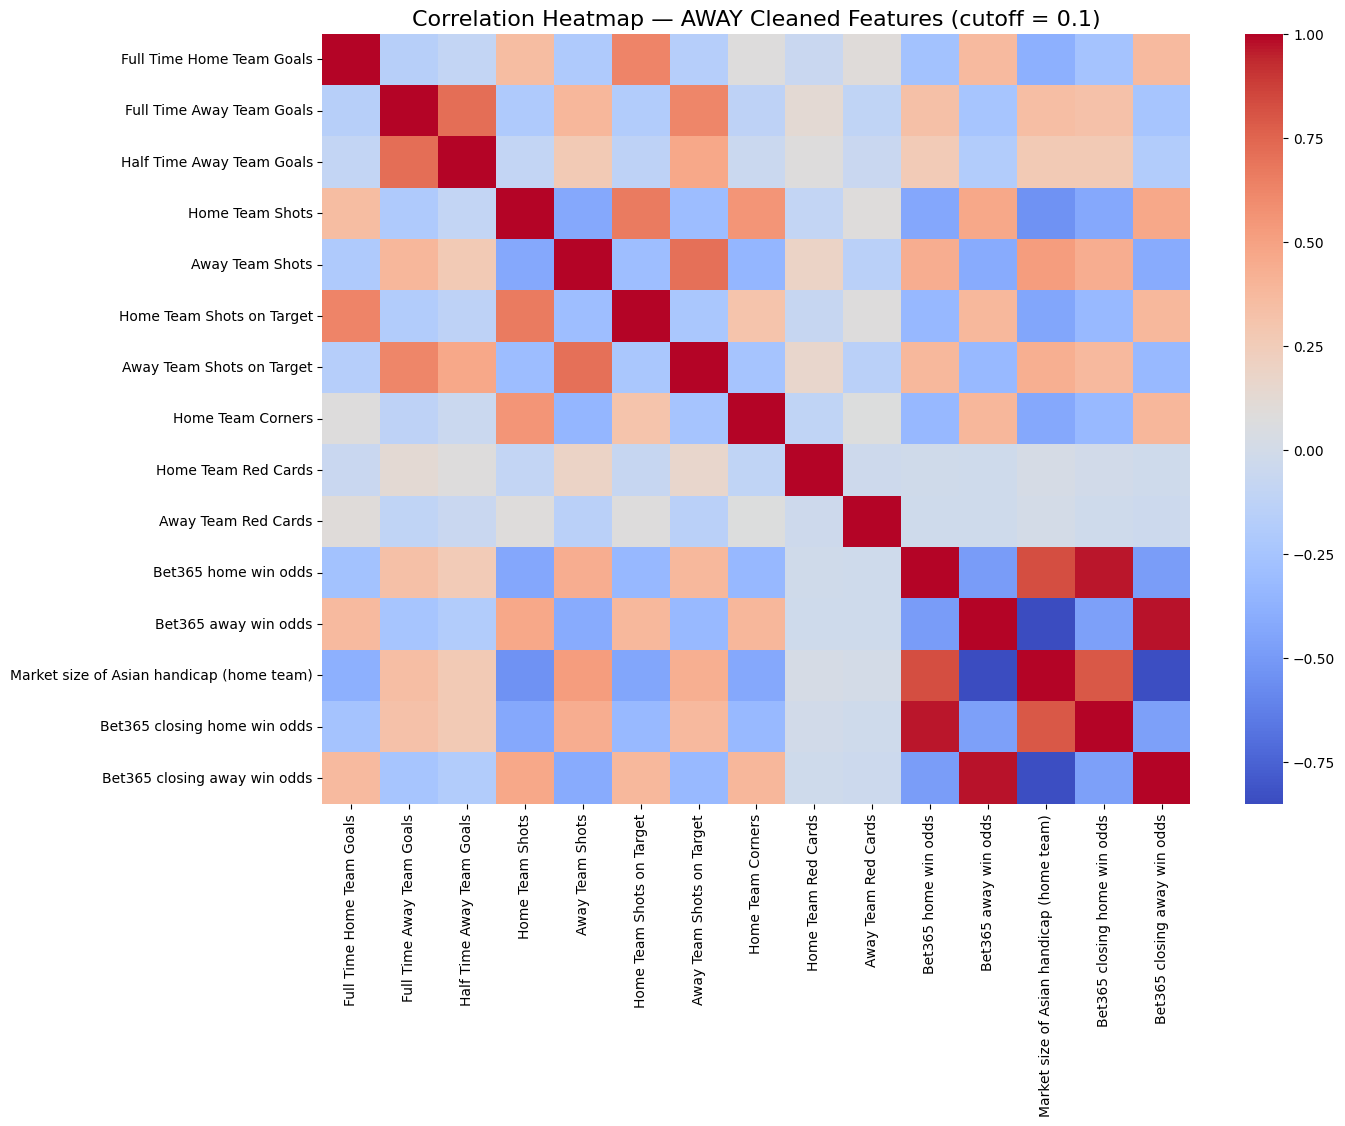

In [94]:
# numeric-only for AWAY cleaned dataset
numeric_home = data_away_clean.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(14, 10))
sns.heatmap(
    numeric_home.corr(),
    cmap='coolwarm',
    annot=False
)
plt.title("Correlation Heatmap — AWAY Cleaned Features (cutoff = 0.1)", fontsize=16)
plt.show()

In [95]:
data_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 36 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Match Date (dd/mm/yy)                              1020 non-null   object 
 1   Match Time                                         1020 non-null   object 
 2   Home Team                                          1020 non-null   object 
 3   Away Team                                          1020 non-null   object 
 4   Full Time Home Team Goals                          1020 non-null   int64  
 5   Full Time Away Team Goals                          1020 non-null   int64  
 6   Full Time Result (H=Home Win, D=Draw, A=Away Win)  1020 non-null   object 
 7   Half Time Home Team Goals                          1020 non-null   int64  
 8   Half Time Away Team Goals                          1020 non-null   int64  
 9   Half Tim

In [96]:
original_teams_df = data_df_reduced[["Home Team", "Away Team"]].copy()

# for future use while building the tables

In [97]:
# -------------------------------------------------
# ONE-HOT ENCODE TEAM + RESULT COLUMNS
# -------------------------------------------------
team_columns = ['Home Team', 'Away Team']
result_columns = [
    'Half Time Result (H=Home Win, D=Draw, A=Away Win)',
    'Full Time Result (H=Home Win, D=Draw, A=Away Win)'
]

encoded_df = pd.get_dummies(
    data_df_reduced,
    columns=team_columns + result_columns,
    drop_first=True
)

print("Original shape:", data_df_reduced.shape)
print("After encoding:", encoded_df.shape)

# -------------------------------------------------
# Inspect what actually got created
# -------------------------------------------------
print("\nColumns containing 'Result':")
print([c for c in encoded_df.columns
       if 'Half Time Result' in c or 'Full Time Result' in c])

# Build prefixes for the one-hot result columns
result_prefixes = [col + '_' for col in result_columns]

result_onehot_cols = [
    c for c in encoded_df.columns
    if any(c.startswith(p) for p in result_prefixes)
]

print("\nResult one-hot columns:")
print(result_onehot_cols)

# to keep working only with encoded_df:
data_df_reduced = encoded_df

Original shape: (1020, 36)
After encoding: (1020, 82)

Columns containing 'Result':
['Half Time Result (H=Home Win, D=Draw, A=Away Win)_D', 'Half Time Result (H=Home Win, D=Draw, A=Away Win)_H', 'Full Time Result (H=Home Win, D=Draw, A=Away Win)_D', 'Full Time Result (H=Home Win, D=Draw, A=Away Win)_H']

Result one-hot columns:
['Half Time Result (H=Home Win, D=Draw, A=Away Win)_D', 'Half Time Result (H=Home Win, D=Draw, A=Away Win)_H', 'Full Time Result (H=Home Win, D=Draw, A=Away Win)_D', 'Full Time Result (H=Home Win, D=Draw, A=Away Win)_H']


In [98]:
# --- TARGETS ---
home_target = 'Full Time Home Team Goals'
away_target = 'Full Time Away Team Goals'

# columns we do NOT want as features (known only after the match, or useless text)
leak_cols = [
    home_target,
    away_target,
    'Full Time Result (H=Home Win, D=Draw, A=Away Win)',
    'Match Date (dd/mm/yy)',
    'Match Time',
    'Match Referee'
]

In [99]:
# --- TRAIN / VAL / TEST SPLIT (by row index) ---

Features: 75
train_df = encoded_df.iloc[0:640]    # 2019/20 + 2020/21
test_df  = encoded_df.iloc[641:]     # 21/22

print(train_df.shape, val_df.shape, test_df.shape)

(640, 82) (231, 82) (379, 82)


In [100]:
# ------------------------------------------------------
# SAVE ORIGINAL TEST SET (before removing columns)
# ------------------------------------------------------

test_df_original = original_teams_df.loc[test_df.index].copy()

print("Saved original test df:", test_df_original.shape)
print("Columns stored:", list(test_df_original.columns)[:10], "...")

Saved original test df: (379, 2)
Columns stored: ['Home Team', 'Away Team'] ...


In [101]:
# --- y VECTORS ---
y_train_home = train_df[home_target]
y_test_home  = test_df[home_target]

y_train_away = train_df[away_target]
y_test_away  = test_df[away_target]

# --- X MATRICES (drop leakage + targets) ---

X_train_home = train_df.drop(columns=leak_cols, errors='ignore')
X_test_home  = test_df.drop(columns=leak_cols, errors='ignore')

X_train_away = train_df.drop(columns=leak_cols, errors='ignore')
X_test_away  = test_df.drop(columns=leak_cols, errors='ignore')

print("X_train_home:", X_train_home.shape)
print("X_train_away:", X_train_away.shape)

X_train_home: (640, 77)
X_train_away: (640, 77)


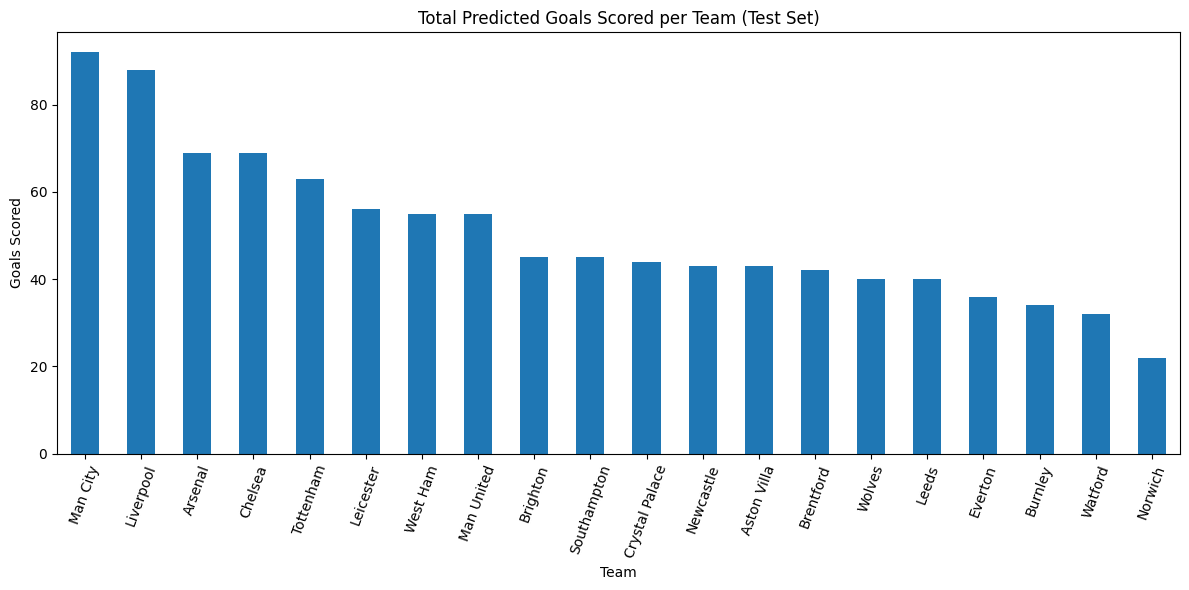

In [102]:
# total predicted goals per team
team_goals = {}

for idx, row in pred_df.iterrows():
    home = row["Home Team"]
    away = row["Away Team"]
    hg = row["Pred_Home_Goals"]
    ag = row["Pred_Away_Goals"]

    team_goals[home] = team_goals.get(home, 0) + hg
    team_goals[away] = team_goals.get(away, 0) + ag

# convert to sorted Series
team_goals_series = pd.Series(team_goals).sort_values(ascending=False)

# plot
plt.figure(figsize=(12,6))
team_goals_series.plot(kind='bar')
plt.title("Total Predicted Goals Scored per Team (Test Set)")
plt.ylabel("Goals Scored")
plt.xlabel("Team")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

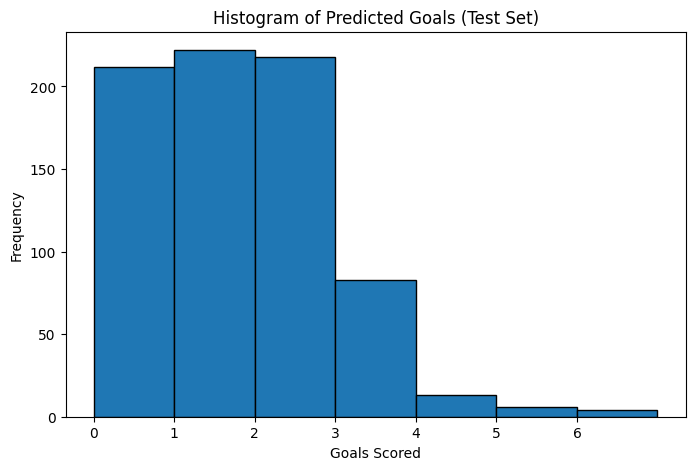

In [103]:
# collect all predicted goals from test set
all_goals = list(pred_df["Pred_Home_Goals"]) + list(pred_df["Pred_Away_Goals"])

plt.figure(figsize=(8,5))
plt.hist(all_goals, bins=range(0, max(all_goals)+2), edgecolor='black')
plt.title("Histogram of Predicted Goals (Test Set)")
plt.xlabel("Goals Scored")
plt.ylabel("Frequency")
plt.xticks(range(0, max(all_goals)+1))
plt.show()

In [104]:
# ============================================
# BASELINE: Mean Predictor (train → predict mean on test)
# ============================================

def evaluate_baseline(y_train, y_test):

    # predict the mean goal value from the training set
    pred_test = np.full_like(y_test, y_train.mean())

    mae_test = mean_absolute_error(y_test, pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

    return mae_test, rmse_test


print("=== HOME GOALS BASELINE ===")
mae_test_h, rmse_test_h = evaluate_baseline(
    y_train_home, y_test_home
)
print("MAE Test:", mae_test_h)
print("RMSE Test:", rmse_test_h)

print("\n=== AWAY GOALS BASELINE ===")
mae_test_a, rmse_test_a = evaluate_baseline(
    y_train_away, y_test_away
)
print("MAE Test:", mae_test_a)
print("RMSE Test:", rmse_test_a)


=== HOME GOALS BASELINE ===
MAE Test: 1.0026385224274406
RMSE Test: 1.4216568430600702

=== AWAY GOALS BASELINE ===
MAE Test: 0.9313984168865436
RMSE Test: 1.2943962845376227


In [105]:
# ================================
# FEATURE IMPORTANCE FUNCTION
# ================================
def show_importances(model, feature_names, label="HOME"):
    importances = model.feature_importances_
    idx = importances.argsort()[::-1]   # sort descending

    print(f"\n====== FEATURE IMPORTANCE ({label}) ======")
    for i in idx[:20]:
        print(f"{feature_names[i]}: {importances[i]:.4f}")


# HOME
show_importances(tree_home, X_train_home.columns, label="HOME")

# AWAY
show_importances(tree_away, X_train_away.columns, label="AWAY")


====== FEATURE IMPORTANCE (HOME) ======
Full Time Result (H=Home Win, D=Draw, A=Away Win)_H: 0.5123
Half Time Home Team Goals: 0.2794
Home Team Shots on Target: 0.1044
Home Team_Leeds: 0.0158
Home Team Fouls Committed: 0.0144
Bet365 closing home win odds: 0.0136
Half Time Result (H=Home Win, D=Draw, A=Away Win)_D: 0.0124
Home Team Corners: 0.0119
Full Time Result (H=Home Win, D=Draw, A=Away Win)_D: 0.0112
Half Time Away Team Goals: 0.0088
Away Team_Crystal Palace: 0.0032
Bet365 closing draw odds: 0.0029
Home Team_Newcastle: 0.0027
Bet365 draw odds: 0.0024
Bet365 Asian handicap home team odds: 0.0019
Away Team_Tottenham: 0.0018
Bet365 away win odds: 0.0010
Away Team_Newcastle: 0.0000
Away Team_West Brom: 0.0000
Away Team_West Ham: 0.0000

====== FEATURE IMPORTANCE (AWAY) ======
Half Time Away Team Goals: 0.5358
Away Team Shots on Target: 0.1202
Full Time Result (H=Home Win, D=Draw, A=Away Win)_H: 0.1061
Full Time Result (H=Home Win, D=Draw, A=Away Win)_D: 0.0554
Half Time Home Team Goa

In [106]:
# ==================================================
# DECISION TREE REGRESSOR (TRAIN + TEST WITH CV)
# ==================================================

def train_and_eval_dtree_cv(X_train, y_train, X_test, y_test, label="HOME"):

    # small hyperparameter grid
    max_depth_list    = [3, 5, 7, 9]
    min_samples_split = [2, 4, 6]

    best_cv_mae = np.inf
    best_model = None
    best_cfg   = None

    print(f"\n===== DECISION TREE (CV): {label} GOALS =====")

    for md in max_depth_list:
        for ms in min_samples_split:

            model = DecisionTreeRegressor(
                max_depth=md,
                min_samples_split=ms,
                random_state=42
            )

            # 5-fold cross validation on training set
            cv_scores = -cross_val_score(
                model,
                X_train, y_train,
                cv=5,
                scoring="neg_mean_absolute_error"
            )

            cv_mae = cv_scores.mean()
            print(f"depth={md}, min_split={ms} => CV MAE={cv_mae:.4f}")

            if cv_mae < best_cv_mae:
                best_cv_mae = cv_mae
                best_model  = model
                best_cfg    = (md, ms)

    # train best model on FULL training set
    best_model.fit(X_train, y_train)

    # evaluate on test set
    pred_test = best_model.predict(X_test)
    mae_test  = mean_absolute_error(y_test, pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

    print(f"\n>>> Best config for {label}: depth={best_cfg[0]}, min_split={best_cfg[1]}")
    print(f"CV MAE:  {best_cv_mae:.4f}")
    print(f"TEST MAE: {mae_test:.4f}, TEST RMSE: {rmse_test:.4f}")

    return best_model


# HOME GOALS
dt_home = train_and_eval_dtree_cv(
    X_train_home, y_train_home,
    X_test_home,  y_test_home,
    label="HOME"
)

# AWAY GOALS
dt_away = train_and_eval_dtree_cv(
    X_train_away, y_train_away,
    X_test_away,  y_test_away,
    label="AWAY"
)


===== DECISION TREE (CV): HOME GOALS =====
depth=3, min_split=2 => CV MAE=0.5849
depth=3, min_split=4 => CV MAE=0.5849
depth=3, min_split=6 => CV MAE=0.5849
depth=5, min_split=2 => CV MAE=0.5519
depth=5, min_split=4 => CV MAE=0.5530
depth=5, min_split=6 => CV MAE=0.5522
depth=7, min_split=2 => CV MAE=0.5578
depth=7, min_split=4 => CV MAE=0.5544
depth=7, min_split=6 => CV MAE=0.5618
depth=9, min_split=2 => CV MAE=0.5576
depth=9, min_split=4 => CV MAE=0.5621
depth=9, min_split=6 => CV MAE=0.5583

>>> Best config for HOME: depth=5, min_split=2
CV MAE:  0.5519
TEST MAE: 0.6019, TEST RMSE: 0.7784

===== DECISION TREE (CV): AWAY GOALS =====
depth=3, min_split=2 => CV MAE=0.6149
depth=3, min_split=4 => CV MAE=0.6149
depth=3, min_split=6 => CV MAE=0.6149
depth=5, min_split=2 => CV MAE=0.5733
depth=5, min_split=4 => CV MAE=0.5765
depth=5, min_split=6 => CV MAE=0.5795
depth=7, min_split=2 => CV MAE=0.5722
depth=7, min_split=4 => CV MAE=0.5758
depth=7, min_split=6 => CV MAE=0.5739
depth=9, min_s

In [107]:
# ==================================================
# RANDOM FOREST REGRESSOR (WITH CROSS-VALIDATION)
# ==================================================

def train_and_eval_rf_cv(X_train, y_train, X_test, y_test, label="HOME"):

    n_estimators_list = [200, 300, 400]
    max_depth_list    = [None, 15, 25]
    min_samples_split_list = [2, 4]

    best_cv_mae = np.inf
    best_model  = None
    best_cfg    = None

    print(f"\n===== RANDOM FOREST (CV): {label} GOALS =====")

    for n in n_estimators_list:
        for depth in max_depth_list:
            for mss in min_samples_split_list:

                model = RandomForestRegressor(
                    n_estimators=n,
                    max_depth=depth,
                    min_samples_split=mss,
                    random_state=42,
                    n_jobs=-1
                )

                # 5-fold CV on training set
                cv_scores = -cross_val_score(
                    model,
                    X_train, y_train,
                    cv=5,
                    scoring="neg_mean_absolute_error",
                    n_jobs=-1
                )

                cv_mae = cv_scores.mean()
                print(f"n={n}, depth={depth}, min_split={mss} => CV MAE={cv_mae:.4f}")

                if cv_mae < best_cv_mae:
                    best_cv_mae = cv_mae
                    best_model  = model
                    best_cfg    = (n, depth, mss)

    # Train best model on full training data
    best_model.fit(X_train, y_train)

    # Evaluate on test set
    pred_test = best_model.predict(X_test)
    mae_test  = mean_absolute_error(y_test, pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

    print(f"\n>>> Best config for {label}: n={best_cfg[0]}, depth={best_cfg[1]}, min_split={best_cfg[2]}")
    print(f"CV MAE:  {best_cv_mae:.4f}")
    print(f"Test MAE: {mae_test:.4f}, Test RMSE: {rmse_test:.4f}")

    return best_model


# HOME GOALS MODEL
rf_home = train_and_eval_rf_cv(
    X_train_home, y_train_home,
    X_test_home,  y_test_home,
    label="HOME"
)

# AWAY GOALS MODEL
rf_away = train_and_eval_rf_cv(
    X_train_away, y_train_away,
    X_test_away,  y_test_away,
    label="AWAY"
)


===== RANDOM FOREST (CV): HOME GOALS =====
n=200, depth=None, min_split=2 => CV MAE=0.5269
n=200, depth=None, min_split=4 => CV MAE=0.5251
n=200, depth=15, min_split=2 => CV MAE=0.5267
n=200, depth=15, min_split=4 => CV MAE=0.5251
n=200, depth=25, min_split=2 => CV MAE=0.5269
n=200, depth=25, min_split=4 => CV MAE=0.5251
n=300, depth=None, min_split=2 => CV MAE=0.5245
n=300, depth=None, min_split=4 => CV MAE=0.5233
n=300, depth=15, min_split=2 => CV MAE=0.5248
n=300, depth=15, min_split=4 => CV MAE=0.5235
n=300, depth=25, min_split=2 => CV MAE=0.5245
n=300, depth=25, min_split=4 => CV MAE=0.5233
n=400, depth=None, min_split=2 => CV MAE=0.5236
n=400, depth=None, min_split=4 => CV MAE=0.5227
n=400, depth=15, min_split=2 => CV MAE=0.5237
n=400, depth=15, min_split=4 => CV MAE=0.5230
n=400, depth=25, min_split=2 => CV MAE=0.5236
n=400, depth=25, min_split=4 => CV MAE=0.5227

>>> Best config for HOME: n=400, depth=None, min_split=4
CV MAE:  0.5227
Test MAE: 0.5309, Test RMSE: 0.7005

=====

In [73]:
# ==================================================
# GRADIENT BOOSTING REGRESSOR (WITH CROSS-VALIDATION)
# ==================================================

def train_and_eval_gb_cv(X_train, y_train, X_test, y_test, label="HOME"):

    n_estimators_list = [150, 250, 400]
    learning_rates    = [0.05, 0.1]
    max_depths        = [2, 3]

    best_cv_mae = np.inf
    best_model  = None
    best_cfg    = None

    print(f"\n===== GRADIENT BOOSTING (CV): {label} GOALS =====")

    for n in n_estimators_list:
        for lr in learning_rates:
            for depth in max_depths:

                model = make_pipeline(
                    SimpleImputer(strategy='mean'),
                    GradientBoostingRegressor(
                        n_estimators=n,
                        learning_rate=lr,
                        max_depth=depth,
                        random_state=42
                    )
                )

                # 5-fold CV — evaluates only on training set
                cv_scores = -cross_val_score(
                    model,
                    X_train, y_train,
                    cv=5,
                    scoring="neg_mean_absolute_error",
                    n_jobs=-1
                )

                cv_mae = cv_scores.mean()

                print(f"n={n}, lr={lr}, depth={depth} => CV MAE={cv_mae:.4f}")

                if cv_mae < best_cv_mae:
                    best_cv_mae = cv_mae
                    best_model  = model
                    best_cfg    = (n, lr, depth)

    # Train best model on FULL training data
    best_model.fit(X_train, y_train)

    # Final evaluation on TEST SET ONLY
    pred_test = best_model.predict(X_test)
    mae_test  = mean_absolute_error(y_test, pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))

    print(f"\n>>> Best config ({label}): n={best_cfg[0]}, lr={best_cfg[1]}, depth={best_cfg[2]}")
    print(f"CV MAE:  {best_cv_mae:.4f}")
    print(f"Test MAE: {mae_test:.4f}, Test RMSE: {rmse_test:.4f}")

    return best_model


# HOME GOALS GB MODEL
gb_home = train_and_eval_gb_cv(
    X_train_home, y_train_home,
    X_test_home,  y_test_home,
    label="HOME"
)

# AWAY GOALS GB MODEL
gb_away = train_and_eval_gb_cv(
    X_train_away, y_train_away,
    X_test_away,  y_test_away,
    label="AWAY"
)


===== GRADIENT BOOSTING (CV): HOME GOALS =====
n=150, lr=0.05, depth=2 => CV MAE=0.5206
n=150, lr=0.05, depth=3 => CV MAE=0.5154
n=150, lr=0.1, depth=2 => CV MAE=0.5141
n=150, lr=0.1, depth=3 => CV MAE=0.5203
n=250, lr=0.05, depth=2 => CV MAE=0.5148
n=250, lr=0.05, depth=3 => CV MAE=0.5158
n=250, lr=0.1, depth=2 => CV MAE=0.5254
n=250, lr=0.1, depth=3 => CV MAE=0.5280
n=400, lr=0.05, depth=2 => CV MAE=0.5191
n=400, lr=0.05, depth=3 => CV MAE=0.5236
n=400, lr=0.1, depth=2 => CV MAE=0.5362
n=400, lr=0.1, depth=3 => CV MAE=0.5409

>>> Best config (HOME): n=150, lr=0.1, depth=2
CV MAE:  0.5141
Test MAE: 0.5307, Test RMSE: 0.7081

===== GRADIENT BOOSTING (CV): AWAY GOALS =====
n=150, lr=0.05, depth=2 => CV MAE=0.5048
n=150, lr=0.05, depth=3 => CV MAE=0.5069
n=150, lr=0.1, depth=2 => CV MAE=0.5026
n=150, lr=0.1, depth=3 => CV MAE=0.5141
n=250, lr=0.05, depth=2 => CV MAE=0.5035
n=250, lr=0.05, depth=3 => CV MAE=0.5080
n=250, lr=0.1, depth=2 => CV MAE=0.5094
n=250, lr=0.1, depth=3 => CV MAE=0

Conclusions:
Since the GB predicts both home and away goals with an approximate <0.50 test MAE, which is significantly better than the baseline
and slightly better than random forest, it's the best model to use

In [67]:
# ================================================
#  PREDICT MATCHES + BUILD LEAGUE TABLE (TEST ONLY)
# ================================================

# ------------------------------------------------
# test_df_original = the original (non-encoded) rows of the test set
# X_test_home = test-set feature matrix for HOME model
# X_test_away = test-set feature matrix for AWAY model
# gb_home, gb_away = trained models
# ------------------------------------------------

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 2000)
pd.set_option("display.colheader_justify", "left")
pd.set_option("display.max_colwidth", None)

# 1️⃣ MAKE PREDICTIONS FOR TEST MATCHES ONLY
pred_home = np.round(gb_home.predict(X_test_home)).astype(int)
pred_away = np.round(gb_away.predict(X_test_away)).astype(int)

# attach predictions to original test matches
pred_df = test_df_original.copy()
pred_df["Pred_Home_Goals"] = pred_home
pred_df["Pred_Away_Goals"] = pred_away

print("Sample predictions:")
print(pred_df[["Home Team", "Away Team", "Pred_Home_Goals", "Pred_Away_Goals"]].head())


# ================================================
#  FUNCTION TO UPDATE LEAGUE TABLE
# ================================================

def update_team(table, team, gf, ga, result):

    table.setdefault(team, {
        "Points": 0, "Played": 0,
        "Wins": 0, "Draws": 0, "Losses": 0,
        "Goals For": 0, "Goals Against": 0,
        "Goal Diff": 0
    })

    table[team]["Played"] += 1
    table[team]["Goals For"] += gf
    table[team]["Goals Against"] += ga
    table[team]["Goal Diff"] = table[team]["Goals For"] - table[team]["Goals Against"]

    if result == "W":
        table[team]["Wins"] += 1
        table[team]["Points"] += 3
    elif result == "D":
        table[team]["Draws"] += 1
        table[team]["Points"] += 1
    else:
        table[team]["Losses"] += 1


# ================================================
#  BUILD THE LEAGUE TABLE
# ================================================

league_table = {}

for _, row in pred_df.iterrows():

    home = row["Home Team"]
    away = row["Away Team"]
    hg = row["Pred_Home_Goals"]
    ag = row["Pred_Away_Goals"]

    if hg > ag:
        # home wins
        update_team(league_table, home, hg, ag, "W")
        update_team(league_table, away, ag, hg, "L")

    elif ag > hg:
        # away wins
        update_team(league_table, away, ag, hg, "W")
        update_team(league_table, home, hg, ag, "L")

    else:
        # draw
        update_team(league_table, home, hg, ag, "D")
        update_team(league_table, away, ag, hg, "D")


# ================================================
#  CONVERT TO SORTED LEAGUE TABLE
# ================================================

table_df = pd.DataFrame.from_dict(league_table, orient="index")

table_df = table_df.sort_values(
    by=["Points", "Goal Diff", "Goals For"],
    ascending=False
)

table_df.insert(0, "Position", range(1, len(table_df) + 1))

print("\n==================== PREDICTED LEAGUE TABLE ====================")
print(table_df)

# optional save:
# table_df.to_csv("predicted_test_only_table.csv")

Sample predictions:
    Home Team   Away Team        Pred_Home_Goals  Pred_Away_Goals
641  Man United           Leeds  2                0              
642     Burnley        Brighton  1                2              
643     Chelsea  Crystal Palace  3                0              
644     Everton     Southampton  2                1              
645   Leicester          Wolves  2                0              

==================== PREDICTED LEAGUE TABLE ====================
                Position  Points  Played  Wins  Draws  Losses  Goals For  Goals Against  Goal Diff
Man City         1        93      38      29     6      3      92         23             69       
Liverpool        2        91      38      29     4      5      88         31             57       
Chelsea          3        76      38      23     7      8      69         35             34       
Tottenham        4        73      38      23     4     11      63         41             22       
Arsenal          5     

In [74]:
# =============================================================
#  RESULT ACCURACY CALCULATOR
# =============================================================

# predicted table (your model output)
pred = table_df.copy()

# real Premier League 2021–22 final table
# Must include: Position, Team, Points, Wins, Draws, Losses, Goals For, Goals Against
real = pd.read_csv("real_2021_22_table.csv")

real = real.rename(columns={"Team": "team"})   # ensure consistent names
pred = pred.rename_axis("team").reset_index()

# =============================================================
#  MERGE BOTH TABLES BY TEAM NAME
# =============================================================

df = pred.merge(real, on="team", suffixes=("_pred", "_real"))

# compute goal difference for real
df["Goal Diff_real"] = df["Goals For_real"] - df["Goals Against_real"]

# =============================================================
#  ERROR METRICS
# =============================================================

MAX_POS = 19         # positions 1–20
MAX_POINTS = 114     # 38 * 3 
MAX_GD = 100         # generous buffer for normalization
MAX_WDL = 38         # matches

# Position error
df["pos_error"] = (df["Position_pred"] - df["Position_real"]).abs()
df["pos_score"] = 1 - df["pos_error"] / MAX_POS

# Points error
df["pts_error"] = (df["Points_pred"] - df["Points_real"]).abs()
df["pts_score"] = 1 - df["pts_error"] / MAX_POINTS

# Goal difference error
df["gd_error"] = (df["Goal Diff_pred"] - df["Goal Diff_real"]).abs()
df["gd_score"] = 1 - df["gd_error"] / MAX_GD

# WDL error
df["wdl_error"] = (
    (df["Wins_pred"] - df["Wins_real"]).abs() +
    (df["Draws_pred"] - df["Draws_real"]).abs() +
    (df["Losses_pred"] - df["Losses_real"]).abs()
)

df["wdl_score"] = 1 - df["wdl_error"] / (3 * MAX_WDL)

# =============================================================
#  FINAL TEAM SCORE
# =============================================================

df["TES_team"] = (
    0.5 * df["pos_score"] +
    0.3 * df["pts_score"] +
    0.1 * df["gd_score"] +
    0.1 * df["wdl_score"]
)

# =============================================================
#  FINAL PROJECT SCORE
# =============================================================

TES_final = df["TES_team"].mean()

print("\n==================== TEAM-BY-TEAM TABLE ACCURACY ====================")
print(df[[
    "team", "pos_score", "pts_score", "gd_score", "wdl_score", "TES_team"
]].sort_values("TES_team", ascending=False))

print("\n==================== FINAL TABLE ACCURACY SCORE ====================")
print(f"TES_final (%) = {TES_final:.4f}")


==================== TEAM-BY-TEAM TABLE ACCURACY ====================
   team             pos_score  pts_score  gd_score  wdl_score  TES_team
0         Man City  1.000000   1.000000   0.96      1.000000   0.996000
9           Wolves  1.000000   0.991228   0.99      0.982456   0.994614
18         Watford  1.000000   0.991228   0.95      0.964912   0.988860
15           Leeds  1.000000   1.000000   0.94      0.947368   0.988737
12     Aston Villa  1.000000   0.991228   0.94      0.964912   0.987860
3        Tottenham  1.000000   0.982456   0.93      0.982456   0.985982
13       Brentford  1.000000   0.973684   0.94      0.991228   0.985228
14     Southampton  1.000000   0.982456   0.94      0.964912   0.985228
16         Everton  1.000000   0.964912   0.99      0.964912   0.984965
17         Burnley  1.000000   0.964912   0.99      0.964912   0.984965
6         West Ham  1.000000   0.964912   0.96      0.964912   0.981965
11  Crystal Palace  1.000000   0.982456   0.93      0.929825   0.